# Plant Connectivity

## Overview

This Jupyter notebook analyzes the connectivity between plants over time using time-series data. The main steps are organized as follows:

## Sections

### 1. **Setup and Imports**
- **Purpose**: To initialize the environment by importing necessary libraries and setting up the workspace.
- **Process**: Import libraries such as numpy, matplotlib, and custom scripts, and define the folder path for data files.

### 2. **Load Data**
- **Purpose**: To load raw data files for the plants and prepare the data for analysis.
- **Process**: Load .raw files from the specified folder, filter out NaNs, and normalize the data.

### 3. **Measuring Connectivity**
- **Purpose**: To measure the connectivity between plants over time using predefined methods.
- **Process**: Apply harmonic connectivity methods and remove artifacts using filters to clean the data.

### 4. **Connectivity Over Time**
- **Purpose**: To visualize connectivity over time in segments.
- **Process**: Chunk the data into segments and calculate connectivity matrices for each segment.

### 5. **Animate Connectivity**
- **Purpose**: To create an animation showing the evolution of connectivity over a day.
- **Process**: Use Matplotlib's animation functions to animate the connectivity data and save it as a GIF.

### 6. **Connectivity One-to-One**
- **Purpose**: To plot the connectivity between one plant and all others.
- **Process**: Extract connectivity matrices for a specific plant, smooth the data, and plot it.

### 7. **Connectivity One-to-Many**
- **Purpose**: To visualize the average connectivity of each plant with all others.
- **Process**: Calculate the average connectivity for each plant, smooth the data, and plot the results.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
# import functions from the utils.py in the ../scripts folder
import sys
sys.path.append('../scripts')
from utils import segment_time_series
folderpath = '../plant_data/Hiver 2024/Fichier RAW/'
filename = 'Acer pensylvanicum 2024-02-28.raw'
# get all filenames in the folder that ends with .raw
filenames = [f for f in os.listdir(folderpath) if f.endswith('.raw')]
sf = 256

## Measuring connectivity over time between the 7 plants

In [160]:
from biotuner.harmonic_connectivity import harmonic_connectivity
from scipy.signal import butter, filtfilt

filename = filenames[1]
data = np.fromfile(folderpath + filename, dtype=np.float32)
data = data[~np.isnan(data)]

artifacts = [19.5, 39, 29.3, 9.75]
date = '2024-02-28'
n_minutes = 5
chunk_size = sf*60*n_minutes
# load the data with this date in the filename
fnames_day = [f for f in filenames if date in f]
plant_names = []
for fname in fnames_day:
    plant_name = ''
    for char in fname:
        if char.isnumeric():
            break
        plant_name += char
    
    plant_names.append(plant_name)
plant_names
data_all = []
for filename in fnames_day:
    data = np.fromfile(folderpath + filename, dtype=np.float32)
    data = data[~np.isnan(data)]
    if len(data) > 0:
        # normalize between 0 and 1
        data = (data - np.min(data)) / (np.max(data) - np.min(data))
        # remove artifacts with a notch filter
        for f in artifacts:
            b, a = butter(2, [f - 0.1, f + 0.1], btype='bandstop', fs=sf)
            data_ = filtfilt(b, a, data_)
        data_all.append(data)

# chunk all data in data_all into 30min segments
data_all = np.array(data_all)
new_data_all = []
for ts in data_all:
    # chunk this ts into segments of sf*60*30
    bounds_time = np.arange(0, len(ts), chunk_size)
    segments = segment_time_series(ts, bounds_time)
    segments = segments[1:-1]
    new_data_all.append(list(segments))
new_data_all = np.array(new_data_all)
new_data_all = np.swapaxes(new_data_all, 0, 1)

conn_matrices = []
for i in range(new_data_all.shape[0]):
        data_ = new_data_all[i]
        hc = harmonic_connectivity(sf=256,
                data=data_,
                peaks_function="EMD",
                precision=0.01,
                n_harm=10,
                harm_function="mult",
                min_freq=0.001,
                max_freq=20,
                n_peaks=8,)

        conn_matrix = hc.compute_harm_connectivity(
                metric="harmsim",
                delta_lim=20,
                save=False,
                savename="_",
                graph=False,
                FREQ_BANDS=None,
                max_denom_rrci=16,
        )
        print(conn_matrix.shape)
        conn_matrices.append(conn_matrix)

# save the connectivity matrices
conn_matrices = np.array(conn_matrices)
np.save('connectivity_matrices_5min_28-02-2024.npy', conn_matrices)

(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)

## Connectivity matrices evolution over time

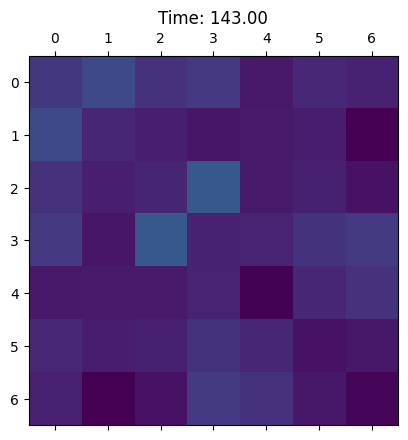

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Generate sample data: replace this with your actual connectivity matrices.
# Assuming the shape is (47, 7, 7)
data = conn_matrices

fig, ax = plt.subplots()
cax = ax.matshow(data[0], cmap='viridis')

# convert time steps into time from 12:00AM to 11:30PM
time_steps = np.arange(0, 144, 0.5)

def update(frame):
    cax.set_data(data[frame])
    # use the time_steps to set the title
    ax.set_title(f'Time: {time_steps[frame]:.2f}')
    return cax,

ani = animation.FuncAnimation(fig, update, frames=len(data), interval=200, blit=True)

# To show the animation in a Jupyter notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

# To save the animation as an MP4 file
ani.save('connectivity_evolution_5min_28-02-2024.gif', writer='pillow', dpi=300)

# To show the plot window (if not using a Jupyter notebook)
plt.show()


## Connectivity one-to-one

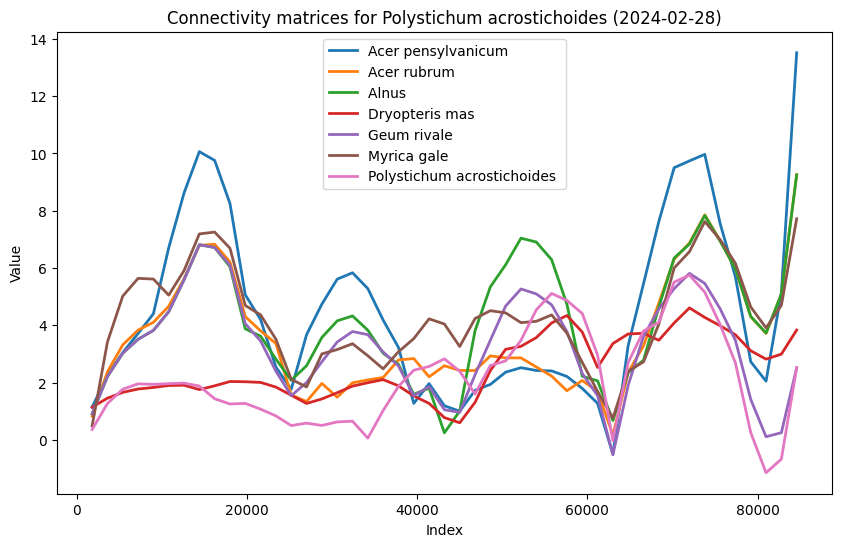

In [149]:
from scipy.signal import savgol_filter
plant_idx = 6
data_to_plot = np.array(conn_matrices)[:, plant_idx, :]
# create timevec from 0 to 24h
timevec = np.arange(0, 24*60*60, 30*60)
timevec = timevec[1:]
# smooth the data

# Plotting
plt.figure(figsize=(10, 6))
for i in range(data_to_plot.shape[1]):
    data_to_plot_ = savgol_filter(data_to_plot[:, i], 10, 3)
    # add the plant name to the legend
    plant_name = plant_names[i]
    plt.plot(timevec, data_to_plot_, label=plant_name, alpha=1, linewidth=2)
    
    
    
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(f'Connectivity matrices for {plant_names[plant_idx][:-1]} ({date})')
plt.legend()
plt.show()

## Connectivity one-to-many

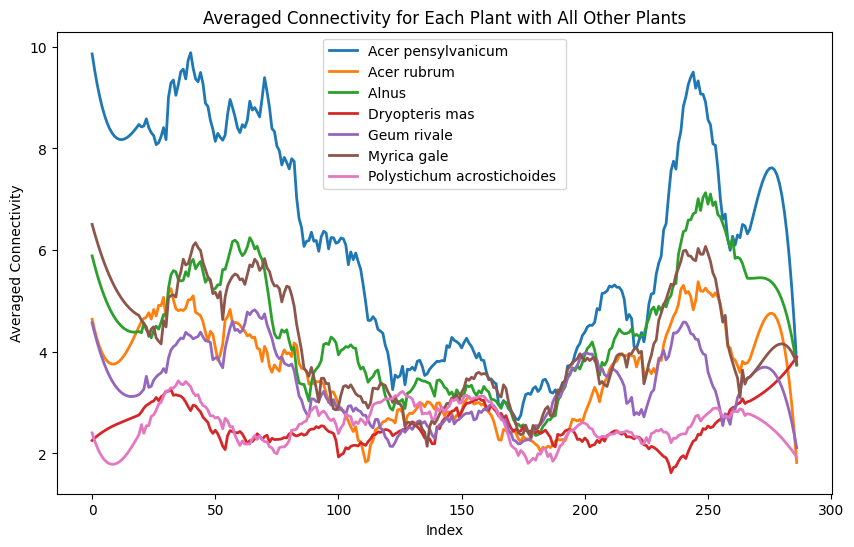

In [170]:
# Plotting
plt.figure(figsize=(10, 6))
for plant_idx in range(conn_matrices.shape[1]):
    data_to_plot = conn_matrices[:, plant_idx, :]
    averaged_connectivity = np.mean(data_to_plot, axis=1)
    smoothed_data = savgol_filter(averaged_connectivity, 40, 3)
    plant_name = plant_names[plant_idx]
    plt.plot(smoothed_data, label=plant_name, alpha=1, linewidth=2)

plt.xlabel('Index')
plt.ylabel('Averaged Connectivity')
plt.title('Averaged Connectivity for Each Plant with All Other Plants')
plt.legend()
plt.show()